In [39]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

/var/folders/3v/wnjt1q_12gn5lscn_jqcbpy40000gn/T/ipykernel_44295/3591678194.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


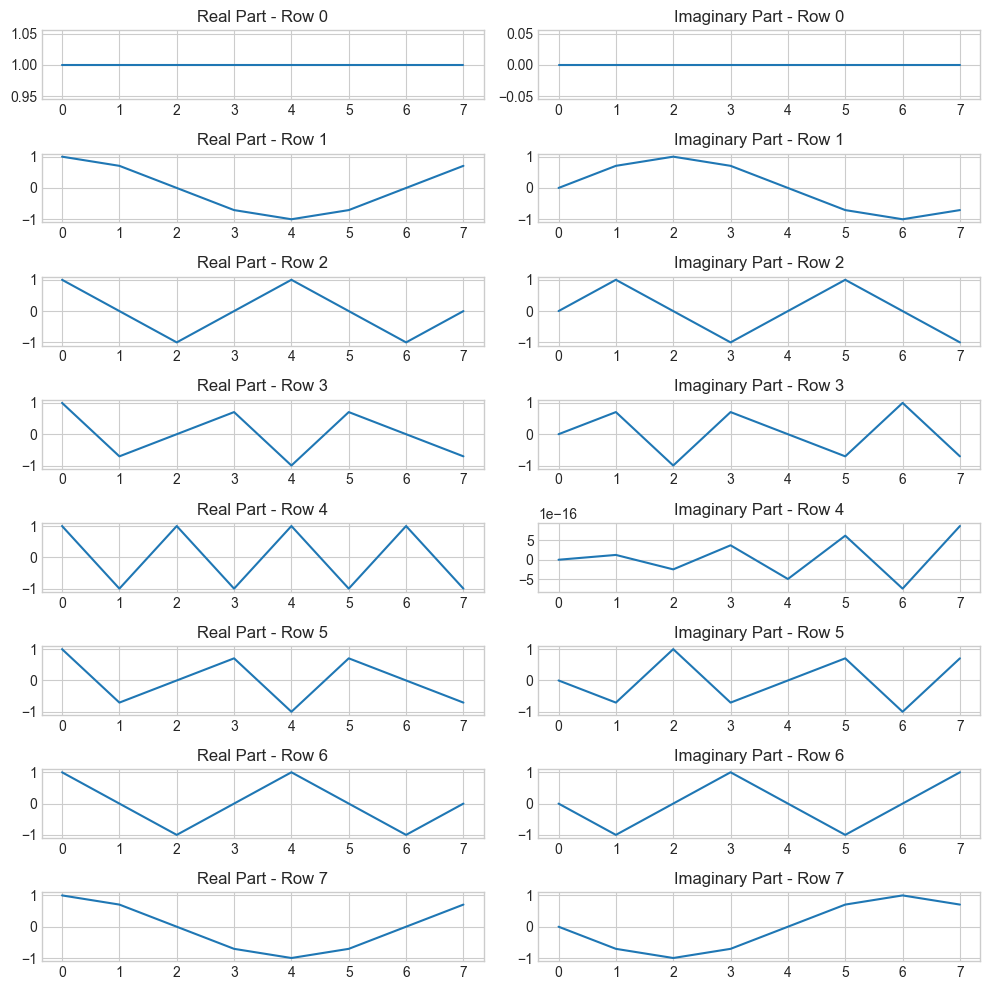

2.1290760425845837e-14


In [40]:
def initFourier(N: int) -> np.array:
    F: np.array = np.empty((N, N), dtype='complex128')
    for i in range(N):
        for k in range(N):
            F[i][k] = np.exp(2 * np.pi * i * 1j * k / N)

    return F


N: int = 8
F: np.array = initFourier(N)

fig, axs = plt.subplots(N, 2, figsize=(10, 10))

for i, ax in enumerate(axs):
    ax[0].plot([x for x in range(8)], F[i].real)
    ax[0].set_title(f'Real Part - Row {i}')

    ax[1].plot([x for x in range(8)], F[i].imag)
    ax[1].set_title(f'Imaginary Part - Row {i}')

plt.tight_layout()
plt.savefig('Ex1.pdf')
plt.savefig('Ex1.png')
plt.show()

print(np.linalg.norm(np.abs(np.matmul(F, F.conj().T)) - 8 * np.identity(N)))


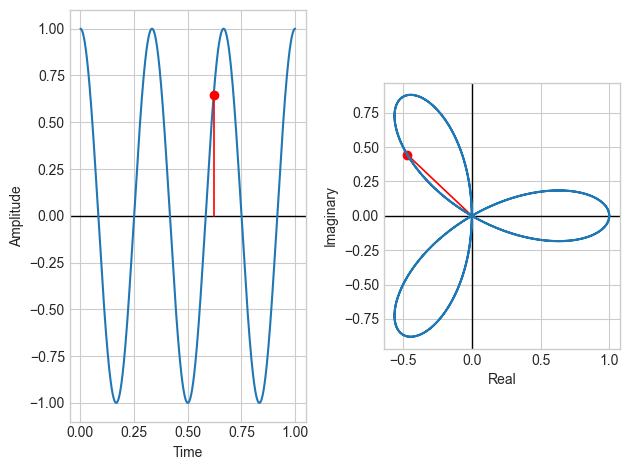

In [53]:
#2

time = np.linspace(0, 1, 1000)

A = 1
f = 3
phi = np.pi / 2

sin = A * np.sin(2 * np.pi * f * time + phi)

x = sin * np.cos(-2 * np.pi * time)     #   (1)
y = sin * np.sin(-2 * np.pi * time)     #   (2)

#   alternativa
#   X = sin * np.exp(-2*np.pi*1j*time)  #   (3)
#
#   In (1), (2) si (3) sinusul joaca rolul 'magnitudinii' in infasuratoare.
#   Daca in loc de 'sin' am avea '1' rezultatul ar fi cercul unitate.
#   Din punct de vedere matematic este echivalent a avea
#   e^(-2πt*i) = cos(-2πt) + i*sin(-2πt), unde i = sqrt(-1)
#   sin * e^(-2πt*i) = sin * (cos(-2πt) + i*sin(-2πt)), unde 'sin' este vector
#   sin * e^(-2πt*i) = sin * cos(-2πt) + sin * i*sin(-2πt), unde 'sin' este vector
#   Re(sin * e^(-2πt*i)) = sin * cos(-2πt)
#   Im(sin * cos(-2πt))  = sin * sin(-2πt)
#
#   Minusul este pus pentru a parcurge/ desena in sensul acelor de ceasornic (invers trigonometric)
#   Vectorul (cu valori discrete - caracter implicit al vectorilor) 'sin' este 'cheia' infasuratorii
#   in jurul cercului.

fig, axs = plt.subplots(1, 2)

point_in_time = 620

axs[0].axhline(y=0, color='black', linewidth='1')   #   Ox axes

axs[0].plot(time, sin)      #   sine wave

axs[0].plot(time[point_in_time], sin[point_in_time], 'or')        #   red dot
axs[0].plot(2 *[time[point_in_time]], [0, sin[point_in_time]], color='red', linewidth=1.2)        #   trace line

axs[0].set_xlabel('Time')
axs[0].set_ylabel('Amplitude')

###

axs[1].axhline(y=0, color='black', linewidth='1')
axs[1].axvline(x=0, color='black', linewidth='1')

axs[1].plot(x[point_in_time], y[point_in_time], 'or')        #   red dot
axs[1].plot([0, x[point_in_time]], [0, y[point_in_time]], color='red', linewidth=1.2)        #   trace line

# axs[1].plot(X.real, X.imag)

axs[1].plot(x, y)
axs[1].set_xlabel('Real')
axs[1].set_ylabel('Imaginary')
axs[1].set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.savefig('Ex2_1.pdf')
plt.savefig('Ex2_1.png')
plt.show()


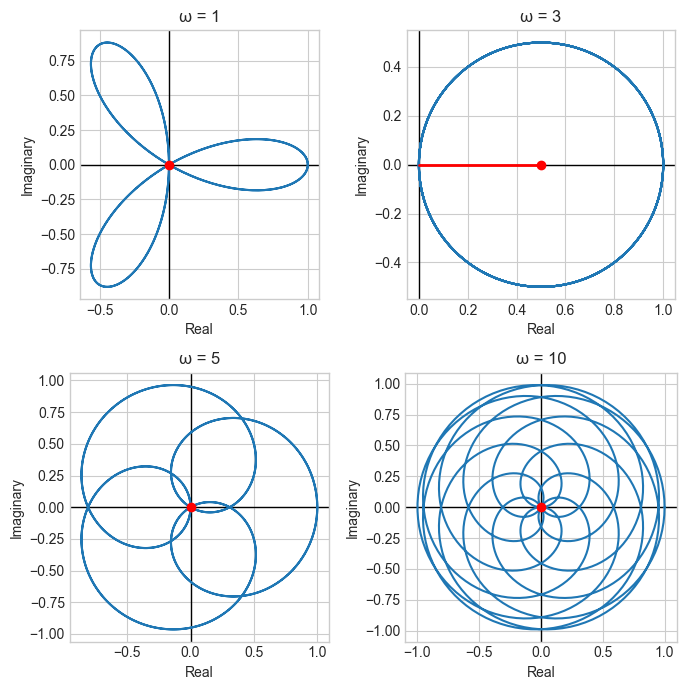

In [55]:
# t = [0, 1]

# C(t) = (1-t) * B + t * R

fig, axs = plt.subplots(2, 2, figsize=(7,7))

omega = 0
fr = [1, 3, 5, 10]

for ax in axs:
    for x in ax:
        x.axhline(y=0, color='black', linewidth='1')
        x.axvline(x=0, color='black', linewidth='1')
        x.set_xlabel('Real')
        x.set_ylabel('Imaginary')
        x.set_aspect('equal', adjustable='box')
        x.title.set_text(f'ω = {fr[omega]}')

        # x_sample = sin * np.cos(-2 * np.pi * fr[omega] * time)
        # y_sample = sin * np.sin(-2 * np.pi * fr[omega] * time)

        X = sin * np.exp(-2j * np.pi * fr[omega] * time)

        # x.plot(x_sample, y_sample)
        # x.plot(np.mean(x_sample), np.mean(y_sample), 'or')
        # x.plot([0, np.mean(x_sample)], [0, np.mean(y_sample)], color='red', linewidth='2')

        x.plot(X.real, X.imag)
        x.plot(np.mean(X.real), np.mean(X.imag), 'or')
        x.plot([0, np.mean(X.real)], [0, np.mean(X.imag)], color='red', linewidth='2')
        omega += 1

plt.savefig('Ex2_2.pdf')
plt.savefig('Ex2_2.png')

plt.tight_layout()
plt.show()

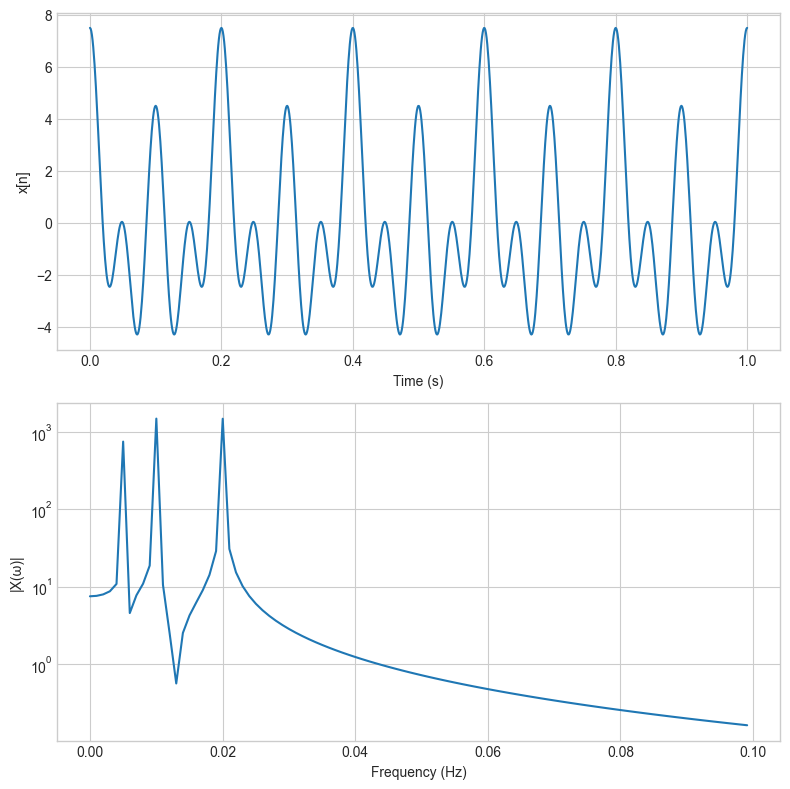

In [47]:
A = 3
f = 10
phi = 0

cos1 = A * np.cos(2 * np.pi * f * time + phi)

A = 1.5
f = 5
phi = 0

cos2 = A * np.cos(2 * np.pi * f * time + phi)

A = 3
f = 20
phi = 0

cos3 = A * np.cos(2 * np.pi * f * time + phi)

signal = cos1 + cos2 + cos3

fig, axs = plt.subplots(2, 1, figsize=(8, 8))

axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('x[n]')
axs[0].plot(time, signal)

axs[1].set_xlabel('Frequency (Hz)')
axs[1].set_ylabel('|X(ω)|')
# axs[1].set_aspect('equal', adjustable='box')

N: int = signal.shape[0]

F = initFourier(N)


axs[1].semilogy(time[:100], np.abs(np.matmul(F, signal))[:100])

plt.tight_layout()
plt.show()
